First we will import all important library which I used for the task.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from PIL import Image

now we will import and covert the image into np.array using pillow.

In [79]:
image_path_4 = '/content/drive/MyDrive/Colab Notebooks/4.png'
img_4 = Image.open(image_path_4) #It will open the image
img_4 = img_4.convert('L') # convert the image to greyscale(i.e L mode)
img_array_4 = np.array(img_4) # convert the PIL image to np.array
print(img_array_4.shape)
print(img_4.mode)
coords_4 = np.column_stack(np.where(img_array_4 > 220)) # list which contain the white points


(64, 64)
L


In [80]:
image_path_2 = '/content/drive/MyDrive/Colab Notebooks/2.png'
img_2 = Image.open(image_path_2) #It will open the image
img_2 = img_2.convert('L') # convert the image to greyscale(i.e L mode)
img_array_2 = np.array(img_2) # convert the PIL image to np.array
print(img_array_2.shape)
print(img_2.mode)
coords_2 = np.column_stack(np.where(img_array_2 > 220)) # list which contain the white points

(64, 64)
L


In [81]:
image_path_1 = '/content/drive/MyDrive/Colab Notebooks/1.png'
img_1 = Image.open(image_path_1) #It will open the image
img_1 = img_1.convert('L') # convert the image to greyscale(i.e L mode)
img_array_1 = np.array(img_1) # convert the PIL image to np.array
print(img_array_1.shape)
print(img_1.mode)
coords_1 = np.column_stack(np.where(img_array_1 > 220)) # list which contain the white points

(64, 64)
L


In [82]:
image_path_3 = '/content/drive/MyDrive/Colab Notebooks/3.png'
img_3 = Image.open(image_path_3) #It will open the image
img_3 = img_3.convert('L') # convert the image to greyscale(i.e L mode)
img_array_3 = np.array(img_3) # convert the PIL image to np.array
print(img_array_3.shape)
print(img_3.mode)
coords_3 = np.column_stack(np.where(img_array_3 > 220)) # list which contain the white points

(64, 64)
L


Now we will define all the function required for K means clustering.

In [83]:
def kmeans(data, k, max_cycle=100):
    centres = first_centres(data, k) # initialize the random points as centres of the clusters
    for _ in range(max_cycle): # iterations for the better opamizing the output data set
        closest = closest_centres(data, centres)
        new_centres = move_centres(data, closest, centres)
        if np.all(new_centres == centres):
            break
        centres = new_centres
    return centres, closest

def first_centres(data, k):       # initialize the centres
    np.random.seed(42)
    random_indices = np.random.permutation(data.shape[0])
    centres = data[random_indices[:k]]
    return centres

def closest_centres(data, centres): # it will find the closest centre of every with every centroid
    distances = np.sqrt(((data - centres[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centres(data, closest, centres): # update the new centres by calculating the means of the present centres with respective points
    return np.array([data[closest==k].mean(axis=0) for k in range(centres.shape[0])])

Now wee will start the kmeans clustering

In [84]:
k_4 = 2  # k is number of desired cluster
centres_4, closest_4 = kmeans(coords_4, k_4)

In [85]:
k_1 = 3  # k is number of desired cluster
centres_1, closest_1 = kmeans(coords_1, k_1)

In [86]:
k_3 = 4  # k is number of desired cluster
centres_3, closest_3 = kmeans(coords_3, k_3)

In [87]:
k_2 = 3  # k is number of desired cluster
centres_2, closest_2 = kmeans(coords_2, k_2)

In [88]:
dist_centres_4 = np.sqrt(((centres_4[:, np.newaxis] - centres_4[np.newaxis, :])**2).sum(axis=2)) # found the distance between the centres of the clustering found
dist_centres_1 = np.sqrt(((centres_1[:, np.newaxis] - centres_1[np.newaxis, :])**2).sum(axis=2)) # found the distance between the centres of the clustering found
dist_centres_2 = np.sqrt(((centres_2[:, np.newaxis] - centres_2[np.newaxis, :])**2).sum(axis=2)) # found the distance between the centres of the clustering found
dist_centres_3 = np.sqrt(((centres_3[:, np.newaxis] - centres_3[np.newaxis, :])**2).sum(axis=2)) # found the distance between the centres of the clustering found


now we will tabulate the data

In [89]:

num_cities_4 = dist_centres_4.shape[0] # number of cities in the satellite image


distance_stat_4 = [] # list to store the distance starments

# Loop through each pair of cities (i, j) where i>j
for i in range(k_4):
    for j in range(k_4):
        if i > j :
            statement = f"Distance between City {i} and City {j} = {dist_centres_4[i, j]:.2f}"
            distance_stat_4.append(statement)

# Print the distance statements
print("for image number 4")
for statement in distance_stat_4:
    print(statement)


for image number 4
Distance between City 1 and City 0 = 40.68


In [90]:
num_cities_1 = dist_centres_1.shape[0] # number of cities in the satellite image


distance_stat_1 = [] # list to store the distance starments

# Loop through each pair of cities (i, j) where i>j
for i in range(k_1):
    for j in range(k_1):
        if i > j :
            statement = f"Distance between City {i} and City {j} = {dist_centres_1[i, j]:.2f}"
            distance_stat_1.append(statement)

# Print the distance statements
print("for image number 1")
for statement in distance_stat_1:
    print(statement)

for image number 1
Distance between City 1 and City 0 = 24.97
Distance between City 2 and City 0 = 26.08
Distance between City 2 and City 1 = 44.16


In [91]:
num_cities_2 = dist_centres_2.shape[0] # number of cities in the satellite image


distance_stat_2 = [] # list to store the distance starments

# Loop through each pair of cities (i, j) where i>j
for i in range(k_2):
    for j in range(k_2):
        if i > j :
            statement = f"Distance between City {i} and City {j} = {dist_centres_2[i, j]:.2f}"
            distance_stat_2.append(statement)

# Print the distance statements
print("for image number 2")
for statement in distance_stat_2:
    print(statement)

for image number 2
Distance between City 1 and City 0 = 17.83
Distance between City 2 and City 0 = 22.96
Distance between City 2 and City 1 = 21.92


In [92]:
num_cities_3 = dist_centres_3.shape[0] # number of cities in the satellite image


distance_stat_3 = [] # list to store the distance starments

# Loop through each pair of cities (i, j) where i>j
for i in range(k_3):
    for j in range(k_3):
        if i > j :
            statement = f"Distance between City {i} and City {j} = {dist_centres_3[i, j]:.2f}"
            distance_stat_3.append(statement)

# Print the distance statements
print("for image number 3")
for statement in distance_stat_3:
    print(statement)

for image number 3
Distance between City 1 and City 0 = 40.12
Distance between City 2 and City 0 = 40.14
Distance between City 2 and City 1 = 56.89
Distance between City 3 and City 0 = 56.34
Distance between City 3 and City 1 = 39.26
Distance between City 3 and City 2 = 40.61


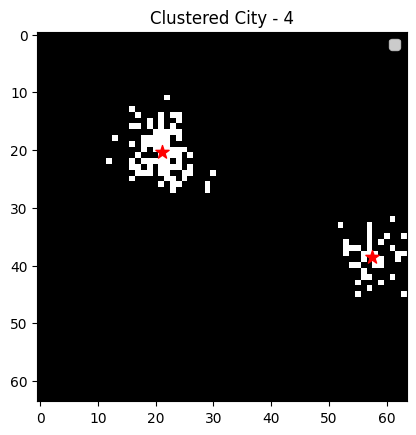

In [93]:
plt.imshow(img_array_4, cmap='gray')
plt.scatter(centres_4[:, 1], centres_4[:, 0], s=100, c='red', marker='*')
plt.title('Clustered City - 4')
plt.legend()
plt.show()

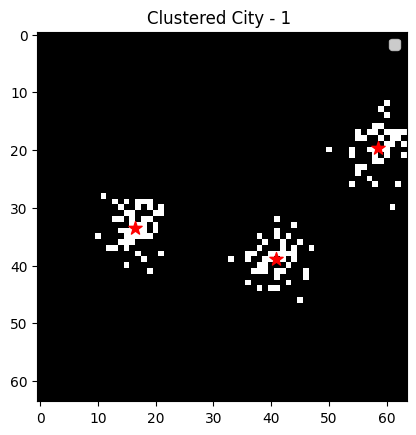

In [94]:
plt.imshow(img_array_1, cmap='gray')
plt.scatter(centres_1[:, 1], centres_1[:, 0], s=100, c='red', marker='*')
plt.title('Clustered City - 1 ')
plt.legend()
plt.show()

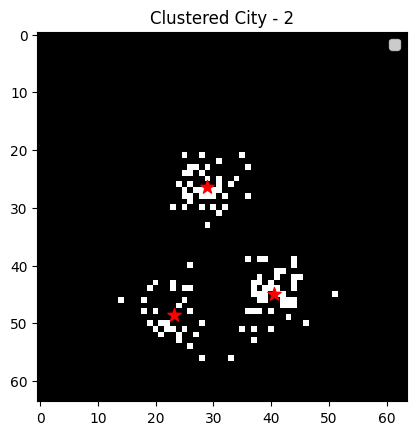

In [95]:
plt.imshow(img_array_2, cmap='gray')
plt.scatter(centres_2[:, 1], centres_2[:, 0], s=100, c='red', marker='*')
plt.title('Clustered City - 2')
plt.legend()
plt.show()

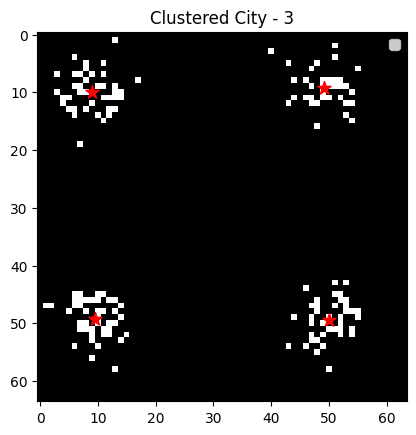

In [96]:
plt.imshow(img_array_3, cmap='gray')
plt.scatter(centres_3[:, 1], centres_3[:, 0], s=100, c='red', marker='*')
plt.title('Clustered City - 3')
plt.legend()
plt.show()

now using elbow method to find optimum value of k

In [97]:
def calculate_wcss(coords, centres, closest):
    wcss = 0
    for i in range(len(centres)):
        wcss += np.sum((coords[closest == i] - centres[i])**2)
    return wcss


In [98]:
wcss_1 = []
k_values = range(1, 20)
for k in k_values:

    # Calculate WCSS for the current k value
    wcss_1.append(calculate_wcss(coords_1, centres_1, closest_1))

wcss_2 = []
k_values = range(1, 20)
for k in k_values:

    # Calculate WCSS for the current k value
    wcss_2.append(calculate_wcss(coords_2, centres_2, closest_2))


wcss_3 = []
k_values = range(1, 20)
for k in k_values:

    # Calculate WCSS for the current k value
    wcss_3.append(calculate_wcss(coords_3, centres_3, closest_3))


wcss_4 = []
k_values = range(1, 20)
for k in k_values:

    # Calculate WCSS for the current k value
    wcss_4.append(calculate_wcss(coords_4, centres_4, closest_4))

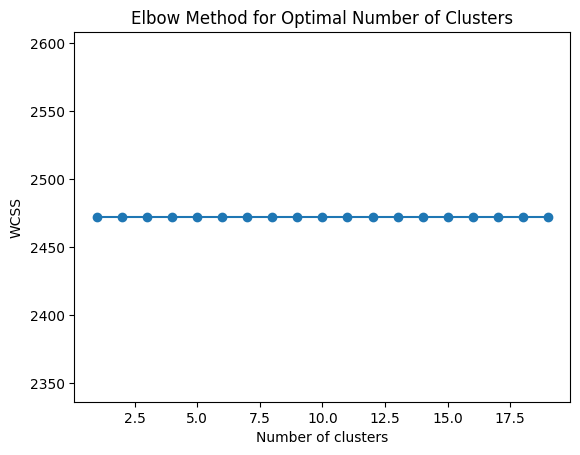

In [99]:
plt.plot(k_values, wcss_1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

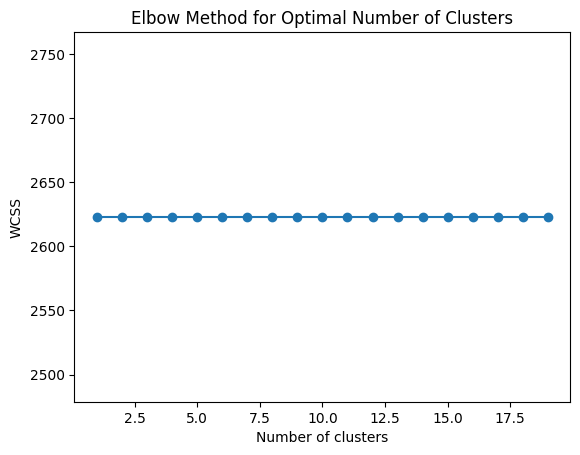

In [100]:
plt.plot(k_values, wcss_2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

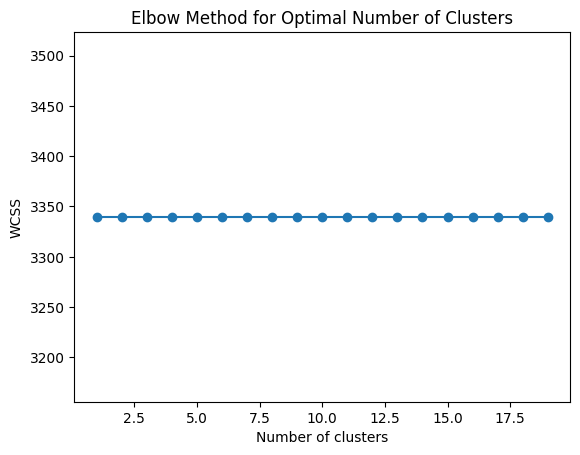

In [101]:
plt.plot(k_values, wcss_3, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

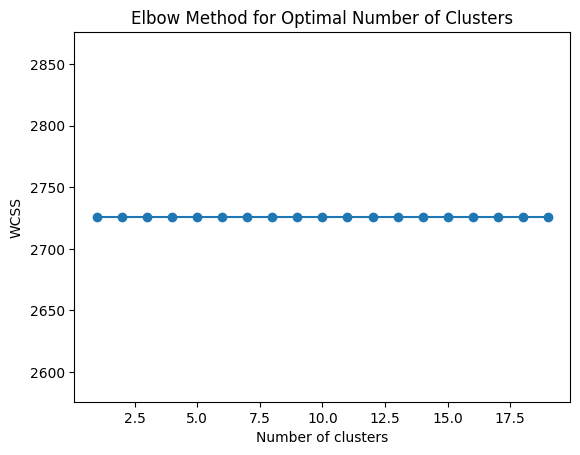

In [102]:
plt.plot(k_values, wcss_4, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()